In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#import in our csv as a dataframe
df = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [3]:
#initial look at the data
df.head(5) 

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

In [4]:
#quick look at the quantitative data
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

I think a fun experiment with this dataset would be predicting the end time of the accident.
The utility this would provide would be allowing for accident information on route planning in the near future.
When planning trips to different cities/states, it can be helpful to preview an hour or so before leaving with a specified departure time and see a forecast of accident information.

##### Data Cleaning / Creating Features

In [5]:
def to_datetime(row):
    '''
    returns datetime object of Start_Time value in given row
    '''
    format_t = "%Y-%m-%d %H:%M:%S"

    if len(row["Start_Time"]) == 19:
        dt = datetime.strptime(row["Start_Time"], format_t)
    
    elif len(row["Start_Time"]) == 26:
        dt = datetime.strptime(row["Start_Time"][:-7], format_t)
    
    elif len(row["Start_Time"]) == 29:
        dt = datetime.strptime(row["Start_Time"][:-10], format_t)
    
    return dt

In [6]:
def time_diff(row):
    '''
    Inputs:
    row - dataframe row containing "End_Time" and "Start_Time" columns with strings containing datetime information
    
    Outputs:
    diff (float) - new value that is difference between start & end, expressed in minutes
    
    account for diff length/spots after decimal :)
    2016-02-08 00:37:08
    2021-11-11 19:36:30.000000000
    2021-10-23 15:50:00.000000
    '''
    format_t = "%Y-%m-%d %H:%M:%S"
    
    if len(row["End_Time"]) == 19:
        diff = (datetime.strptime(row["End_Time"], format_t) - datetime.strptime(row["Start_Time"], format_t))
    
    elif len(row["End_Time"]) == 26:
        diff = (datetime.strptime(row["End_Time"][:-7], format_t) - datetime.strptime(row["Start_Time"][:-7], format_t))
    
    elif len(row["End_Time"]) == 29:
        diff = (datetime.strptime(row["End_Time"][:-10], format_t) - datetime.strptime(row["Start_Time"][:-10], format_t))

    diff = diff.total_seconds() / 60
    
    return diff

In [7]:
#create new column from above function
df["duration(min)"] = df.apply(lambda row: time_diff(row), axis=1)

In [8]:
df["duration(min)"].describe()

count    2.845342e+06
mean     3.590335e+02
std      9.329918e+03
min      2.000000e+00
25%      7.398333e+01
50%      1.200000e+02
75%      2.236833e+02
max      1.682579e+06
Name: duration(min), dtype: float64

In [9]:
df["duration(min)"].value_counts()

360.000000      353058
240.000000       55394
15.000000        37038
30.000000        35345
60.000000        28845
                 ...  
2243.500000          1
994.716667           1
500.116667           1
2307.216667          1
10217.266667         1
Name: duration(min), Length: 70597, dtype: int64

In [10]:
#high amount of values are at 360mins exactly - likely a default time
#will this have an effect on our regression?

#cutting off any rows where duration is over duration threshold & exactly equal to 360
duration_threshold = 4320 / 3 # mins in 1 day
mask = (df["duration(min)"] != 360.0) & (df["duration(min)"] < duration_threshold)
df = df[mask]

<AxesSubplot: xlabel='duration(min)', ylabel='Count'>

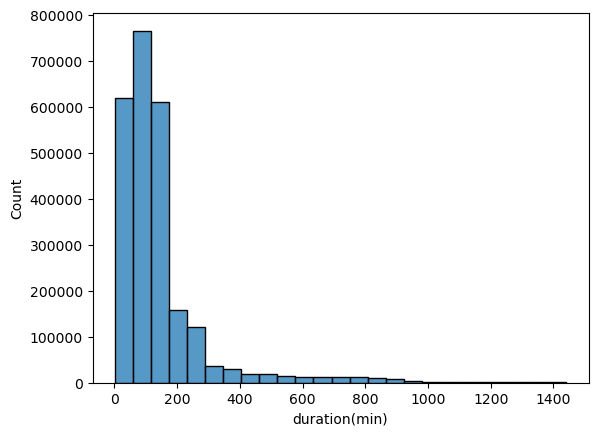

In [12]:
sns.histplot(df["duration(min)"],bins=25)

In [11]:
#this looks like a much better distribution

In [12]:
#check where cols are null
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1449057
Street                         2
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1063
Country                        0
Timezone                    3311
Airport_Code                8850
Weather_Timestamp          46163
Temperature(F)             60637
Wind_Chill(F)             173828
Humidity(%)                64046
Pressure(in)               51674
Visibility(mi)             60462
Wind_Direction             68896
Wind_Speed(mph)            96385
Precipitation(in)         238336
Weather_Condition          60439
Amenity   

In [13]:
#create time_of_incident col
df["Time_of_Incident"] = df.apply(lambda row: to_datetime(row), axis=1)

In [14]:
#create column of day of week to get dummies for
df["Day"] = df.apply(lambda row: row.Time_of_Incident.day_name(), axis=1)

In [15]:
#same for hour of the day
df["Hour"] = df.apply(lambda row: row.Time_of_Incident.hour, axis=1)

In [16]:
df["Weather_Condition"].value_counts().sort_values(ascending=False).index.tolist()

['Fair',
 'Cloudy',
 'Mostly Cloudy',
 'Partly Cloudy',
 'Light Rain',
 'Clear',
 'Fog',
 'Light Snow',
 'Haze',
 'Overcast',
 'Rain',
 'Fair / Windy',
 'Scattered Clouds',
 'Heavy Rain',
 'Thunder in the Vicinity',
 'Smoke',
 'Cloudy / Windy',
 'T-Storm',
 'Mostly Cloudy / Windy',
 'Thunder',
 'Light Drizzle',
 'Light Rain with Thunder',
 'Snow',
 'Partly Cloudy / Windy',
 'Wintry Mix',
 'Heavy T-Storm',
 'Light Rain / Windy',
 'Light Snow / Windy',
 'Drizzle',
 'Heavy Snow',
 'Rain / Windy',
 'N/A Precipitation',
 'Patches of Fog',
 'Shallow Fog',
 'Mist',
 'Heavy Rain / Windy',
 'Showers in the Vicinity',
 'Light Freezing Rain',
 'Haze / Windy',
 'Snow / Windy',
 'Heavy T-Storm / Windy',
 'Fog / Windy',
 'Light Freezing Drizzle',
 'T-Storm / Windy',
 'Light Freezing Fog',
 'Thunder / Windy',
 'Heavy Snow / Windy',
 'Light Thunderstorms and Rain',
 'Thunderstorm',
 'Blowing Dust / Windy',
 'Blowing Dust',
 'Drizzle and Fog',
 'Light Rain Shower',
 'Blowing Snow',
 'Heavy Drizzle',
 '

In [17]:
#create new weather column that narrows possible values
def narrow_weather(row):
    #define keywords to categorize by
    keywords = {
        "rain" : "rain",
        "storm" : "storm",
        "drizzle" : "rain",
        "snow" : "snow",
        "sleet" : "snow",
        "fair" : "fair",
        "clear" : "fair",
        "windy" : "windy",
        "fog" : "fog",
        "haze" : "fog",
        "hail" : "hail",
        "thunder" : "storm",
        "overcast" : "cloudy",
        "cloud" : "cloudy",
        "wintry" : "snow",
        "drizzle" : "rain",
        "mist" : "fog",
        "smoke" : "smoke",
        "shower" : "rain",
        "precipitation" : "rain",
        "dust" : "dust",
        "ice" : "hail",
        "sand" : "dust",
        "squall" : "storm",
    }
    
    entry = np.nan
    for k, v in keywords.items():
        if k in row["Weather_Condition"].lower():
            entry = v

    return entry

In [18]:
#drop weather NaN values before running func
df = df.dropna(subset=["Weather_Condition"])
df["weather"] = df.apply(lambda row: narrow_weather(row), axis=1)

In [19]:
df["weather"].unique()

array(['cloudy', 'fair', 'rain', 'fog', 'snow', 'storm', 'smoke', 'windy',
       'dust', nan, 'hail'], dtype=object)

In [82]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1410936
Street                         1
Side                           0
City                         104
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)              9876
Wind_Chill(F)             120435
Humidity(%)                13250
Pressure(in)                3003
Visibility(mi)              6092
Wind_Direction             17297
Wind_Speed(mph)            43456
Precipitation(in)         189963
Weather_Condition              0
Amenity   

In [20]:
#replace N/A precipitation with 0, since most are for clear/overcast weather
#there is potential that precipitation is 0 but also wet/snowy conditions, 
#so will not drop those values unless it clearly poorly affects model later.
df["Precipitation(in)"].fillna(value=0.0, inplace=True)

In [21]:
assert df[df["Precipitation(in)"].isna()]["weather"].value_counts().shape[0] == 0

In [22]:
#dropping where temp, weather & visibility are null.
df = df.dropna(subset=["Visibility(mi)", "Temperature(F)", "weather"])

In [23]:
#checking sunrise sunset hour values, out of curiosity
df[df["Sunrise_Sunset"].isnull()]["Hour"].value_counts()

15    154
14    134
16    128
13    124
18    123
17    117
12    112
20    104
8     101
9     100
10     99
21     99
7      99
11     94
19     92
6      81
22     69
23     60
5      49
0      45
4      40
1      34
2      32
3      22
Name: Hour, dtype: int64

In [24]:
#no real distribution, lines up with common driving hours. dropping
df = df.dropna(subset=["Sunrise_Sunset"])

In [25]:
#how many entries do we still have?
df.shape[0]

2394479

In [26]:
df["Wind_Speed(mph)"].describe()

count    2.353551e+06
mean     7.177552e+00
std      5.489298e+00
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64

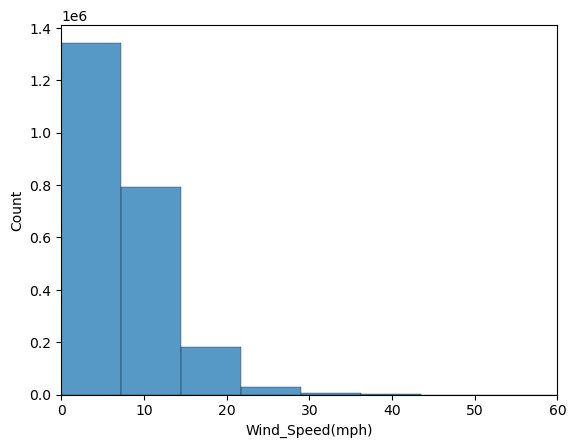

In [27]:
fig, ax = plt.subplots()
sns.histplot(df["Wind_Speed(mph)"],bins=150)
ax.set_xlim(0,60)
plt.show()

In [28]:
#drop where wind speed is NaN & higher than 75mph
df = df.dropna(subset=["Wind_Speed(mph)"])
df = df[df["Wind_Speed(mph)"] <= 75]

In [29]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1373694
Street                         1
Side                           0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)              69276
Humidity(%)                 3275
Pressure(in)                1290
Visibility(mi)                 0
Wind_Direction                29
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition              0
Amenity   

In [61]:
#columns we want to keep for our model
features = ["Severity", "Temperature(F)", "Visibility(mi)",
"Precipitation(in)", "weather", "Junction", "Stop", "Traffic_Signal",
"Sunrise_Sunset", "Day", "Hour"]

val_to_predict = ["duration(min)"]

In [94]:
X = df[features]
Y = df[val_to_predict]

#### Building Model

In [30]:
#import ML packages
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [111]:
#encode categoricals for weather, junction, stop, traffic_signal, sunrise_sunset, day, hour
#encode ordinals for severity
categorical = ["weather","Junction","Stop","Traffic_Signal","Sunrise_Sunset","Day","Hour"]
ordinal = ["Severity"]

ohe = OneHotEncoder(sparse=False)
X_cat_arr = ohe.fit_transform(df[categorical])

oe = OrdinalEncoder()
X_ord_arr = oe.fit_transform(df[ordinal])

In [113]:
assert X_cat_arr.shape[0] == X.shape[0]
assert X_ord_arr.shape[0] == X.shape[0]

In [127]:
X = X.join(pd.get_dummies(df[categorical]),lsuffix="ohe_")

In [128]:
X.shape

(2353492, 34)

In [131]:
X = X.drop(labels=categorical, axis=1)

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [137]:
reg = GradientBoostingRegressor(random_state=42)

In [139]:
reg.fit(X_train, Y_train)

f:\Traffic_data\.conda\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [142]:
Y_pred = reg.predict(X_test)

In [141]:
reg.score(X_test, Y_test)

0.08558879185626223

In [143]:
Y_pred.shape

(588373,)

In [168]:
Y_test2 = np.array(Y_test).ravel()

In [154]:
r2_score(Y_test, Y_pred)

0.08558879185626223

(0.0, 10000.0)

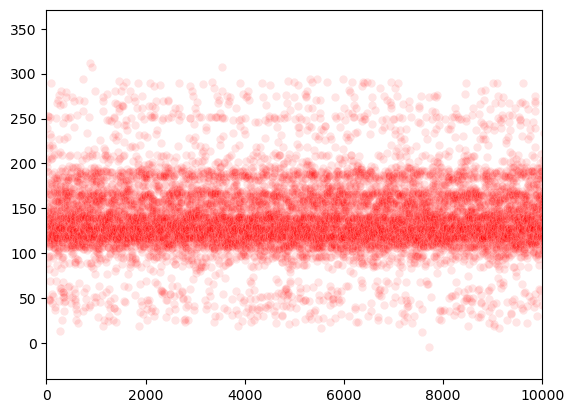

In [180]:
fig, ax = plt.subplots()
sns.scatterplot(Y_pred,alpha=0.10,color="red")
ax.set_xlim(0,10000)

(0.0, 10000.0)

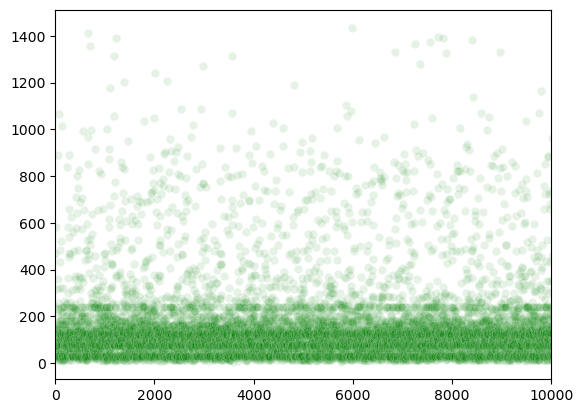

In [179]:
fig, ax = plt.subplots()
sns.scatterplot(Y_test2,alpha=0.10,color="green")
ax.set_xlim(0,10000)

In [177]:
Y_pred[2]

156.40137309802137

In [178]:
Y_test2[2]

80.06666666666666

In [182]:
#our data seems skewed and is predicting way too high of times, i think we should eliminate any points where accident duration is over 360mins
df = df[df["duration(min)"] < 360.0]

In [186]:
X = df[features]
Y = df[val_to_predict]
Y = Y = np.array(Y).ravel()
X = X.join(pd.get_dummies(df[categorical]),lsuffix="ohe_")
X = X.drop(labels=categorical, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [187]:
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [188]:
Y_Pred = reg.predict(X_test)

In [189]:
reg.score(X_test, Y_test)

0.08468406449963584

(0.0, 1000.0)

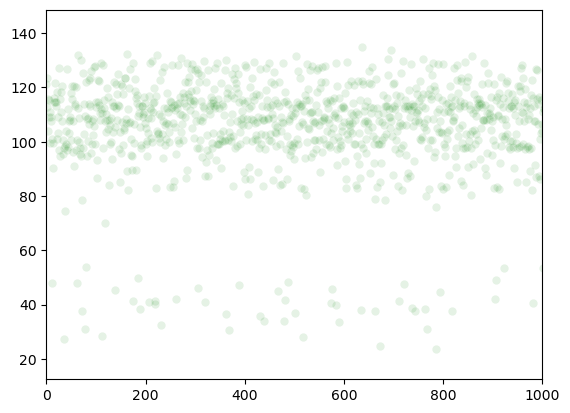

In [193]:
fig, ax = plt.subplots()
sns.scatterplot(Y_Pred,alpha=0.10,color="green")
ax.set_xlim(0,1000)

(0.0, 1000.0)

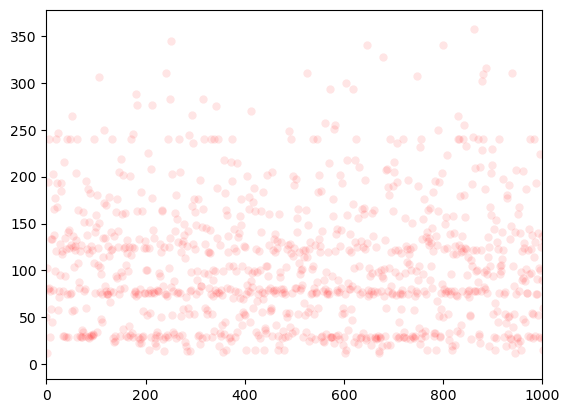

In [194]:
fig, ax = plt.subplots()
sns.scatterplot(Y_test,alpha=0.10,color="red")
ax.set_xlim(0,1000)

In [196]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred_linreg = linreg.predict(X_test)

(0.0, 10000.0)

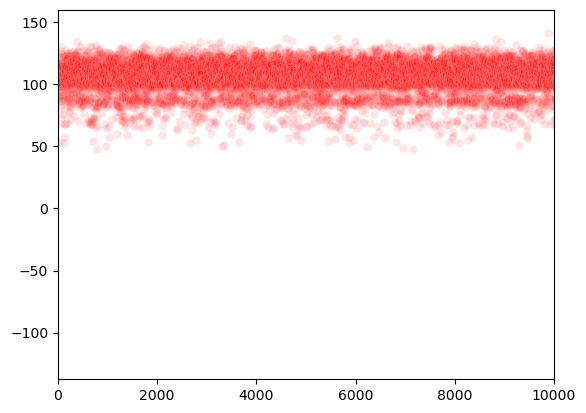

In [200]:
fig, ax = plt.subplots()
sns.scatterplot(Y_pred_linreg,alpha=0.10,color="red")
ax.set_xlim(0,10000)

In [203]:
linreg.score(X_test, Y_test)

0.033049985384381086

In [204]:
#poorer performance from linear regression, but score 0.08 for gradient boosting is still pretty bad for default params.
#this is most likely due to our features, or due to there being close to no correlation in the dataset.

In [206]:
#how does it score on the training data?
linreg.score(X_train, Y_train)

0.03357283675876033

In [207]:
reg.score(X_train, Y_train)

0.08554511633150674

In [208]:
from sklearn.model_selection import cross_val_score

In [209]:
cross_val_score(reg, X, Y, cv=3)

array([-0.04208818, -0.06669283, -0.28261501])

In [210]:
from sklearn.metrics import mean_squared_error

In [213]:
np.sqrt(mean_squared_error(Y_test, Y_Pred)) / Y_test.mean()

0.6085599720776217

In [214]:
diff = Y_test - Y_Pred

<AxesSubplot: >

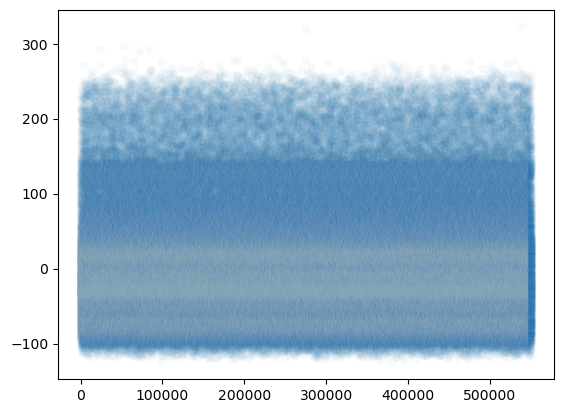

In [217]:
sns.scatterplot(diff, alpha = 0.03)

In [218]:
from sklearn.tree import DecisionTreeRegressor

In [219]:
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [220]:
tree_pred = tree.predict(X_test)

In [221]:
tree.score(X_test, Y_test)

-0.0698563908068277

In [222]:
tree_pred

array([ 56.5       ,  33.11666667, 101.21376812, ..., 132.09444444,
        92.33833333,  96.5765873 ])

In [223]:
np.sqrt(mean_squared_error(Y_test, tree_pred))

69.22640645633393

In [224]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf.score(X_test, Y_test)

0.06285583388733385

C:\Users\brendo\AppData\Local\Temp\ipykernel_27360\3274683854.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().plot()


<AxesSubplot: >

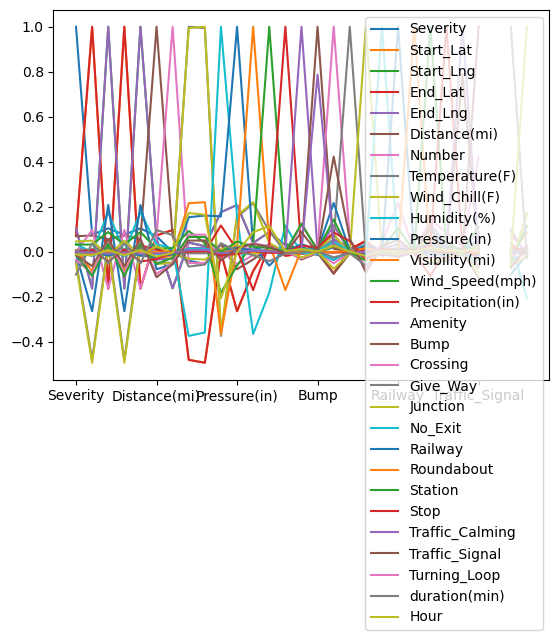

In [227]:
df.corr().plot()

In [1]:
df

NameError: name 'df' is not defined

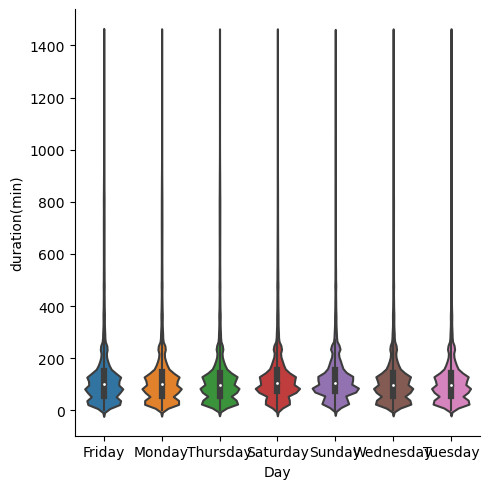

In [33]:
sns.catplot(data=df, x="Day", y="duration(min)", kind="violin")

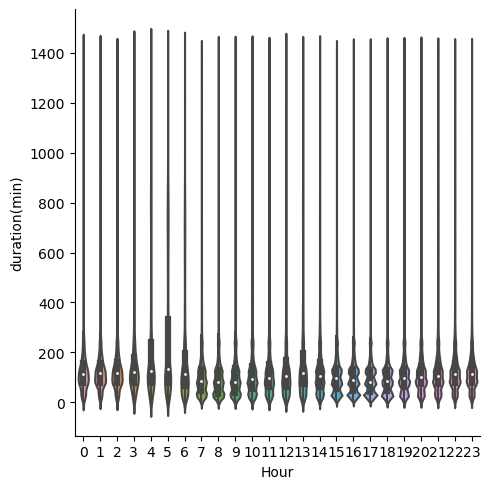

In [35]:
sns.catplot(data=df, x="Hour", y="duration(min)", kind="violin")

<AxesSubplot: xlabel='County', ylabel='duration(min)'>

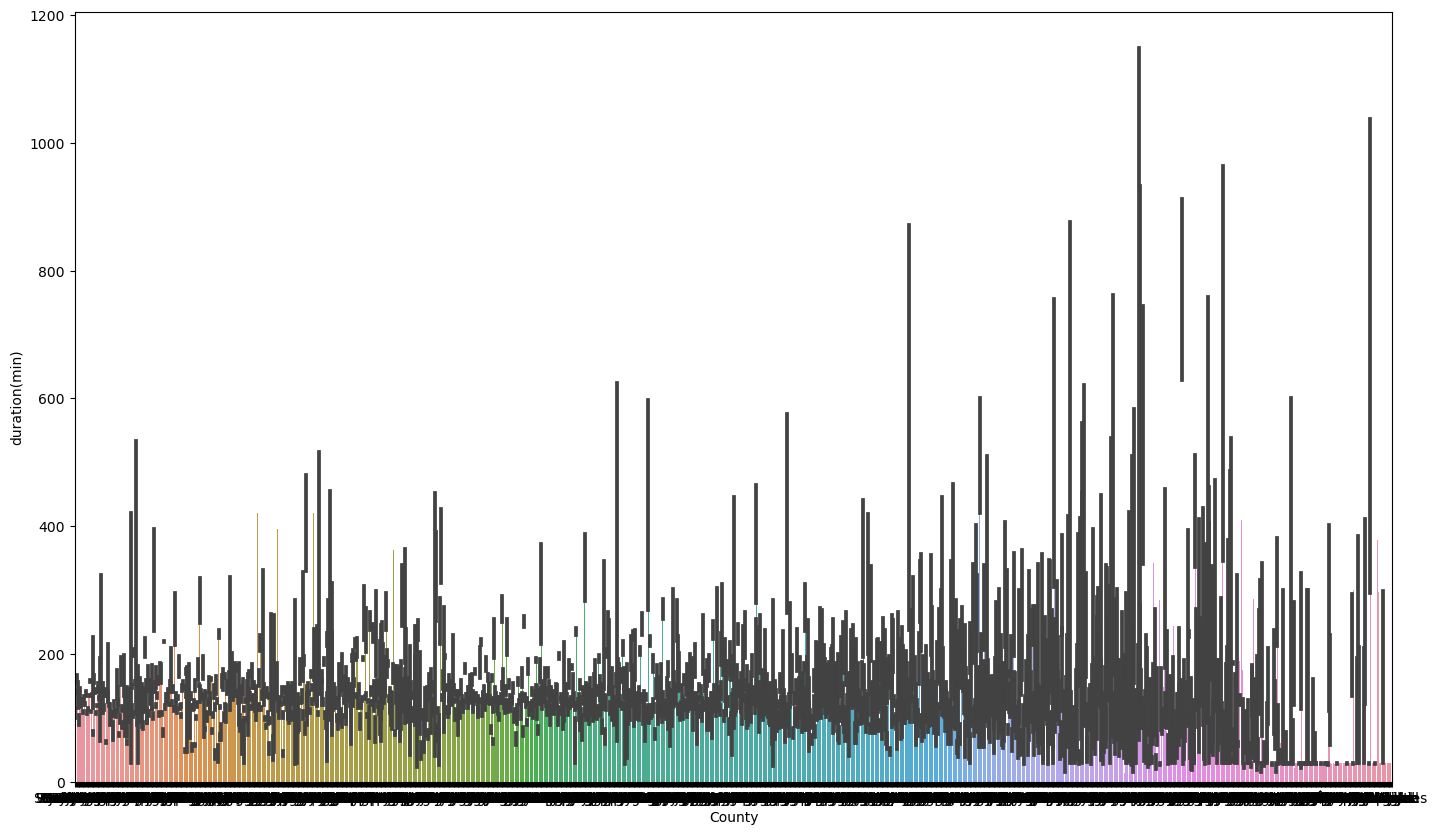

In [45]:
sns.barplot(data=df, x="County", y="duration(min)")

In [47]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'duration(min)', 'Time_of_Incident', 'Day',
       'Hour', 'weather'],
      dtype='object')

In [49]:
df.State.unique()

array(['OH', 'PA', 'IN', 'KY', 'CA', 'CO', 'IA', 'MN', 'TX', 'MO', 'OK',
       'LA', 'KS', 'MS', 'AR', 'WI', 'NE', 'IL', 'VA', 'RI', 'FL', 'MD',
       'TN', 'NY', 'CT', 'GA', 'MI', 'NC', 'NH', 'WV', 'NJ', 'SC', 'ME',
       'DE', 'MA', 'AZ', 'UT', 'ID', 'NM', 'MT', 'OR', 'WA', 'NV', 'VT',
       'AL', 'ND', 'DC', 'WY', 'SD'], dtype=object)

In [39]:
df["State_County"] = df["State"] + "," + df["County"]

In [40]:
df["State_County"].unique().shape[0]

2582

In [60]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'duration(min)', 'Time_of_Incident', 'Day',
       'Hour', 'weather', 'loc', 'State_County'],
      dtype='object')

In [62]:
expanded_feats = ["Severity", "Temperature(F)", "Visibility(mi)",
"Precipitation(in)", "weather", "Junction", "Stop", "Traffic_Signal",
"Sunrise_Sunset", "Day", "Hour", "State_County", "Station", "Roundabout", "Give_Way", "Crossing", "Amenity", "Bump", "No_Exit", "Railway"]
x = df[expanded_feats]
y = df[val_to_predict]

In [65]:
cat = ["weather", "Junction", "Stop", "Traffic_Signal", "Sunrise_Sunset", "Day", "Hour", "State_County", "Station", "Roundabout", "Give_Way", "Crossing", "Amenity", "Bump", "No_Exit", "Railway"]
x = x.join(pd.get_dummies(df[cat]),lsuffix="ohe_")

In [66]:
x = x.drop(labels=cat, axis=1)

In [67]:
y = np.array(y).ravel()

In [69]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y)

In [70]:
greg = GradientBoostingRegressor(random_state=42)

In [71]:
greg.fit(x_tr, y_tr)

GradientBoostingRegressor(random_state=42)

In [72]:
y_pr = greg.predict(x_te)

In [73]:
greg.score(x_te, y_te)

0.12341149569198129

In [74]:
greg.score(x_tr, y_tr)

0.12489698386612347

<AxesSubplot: >

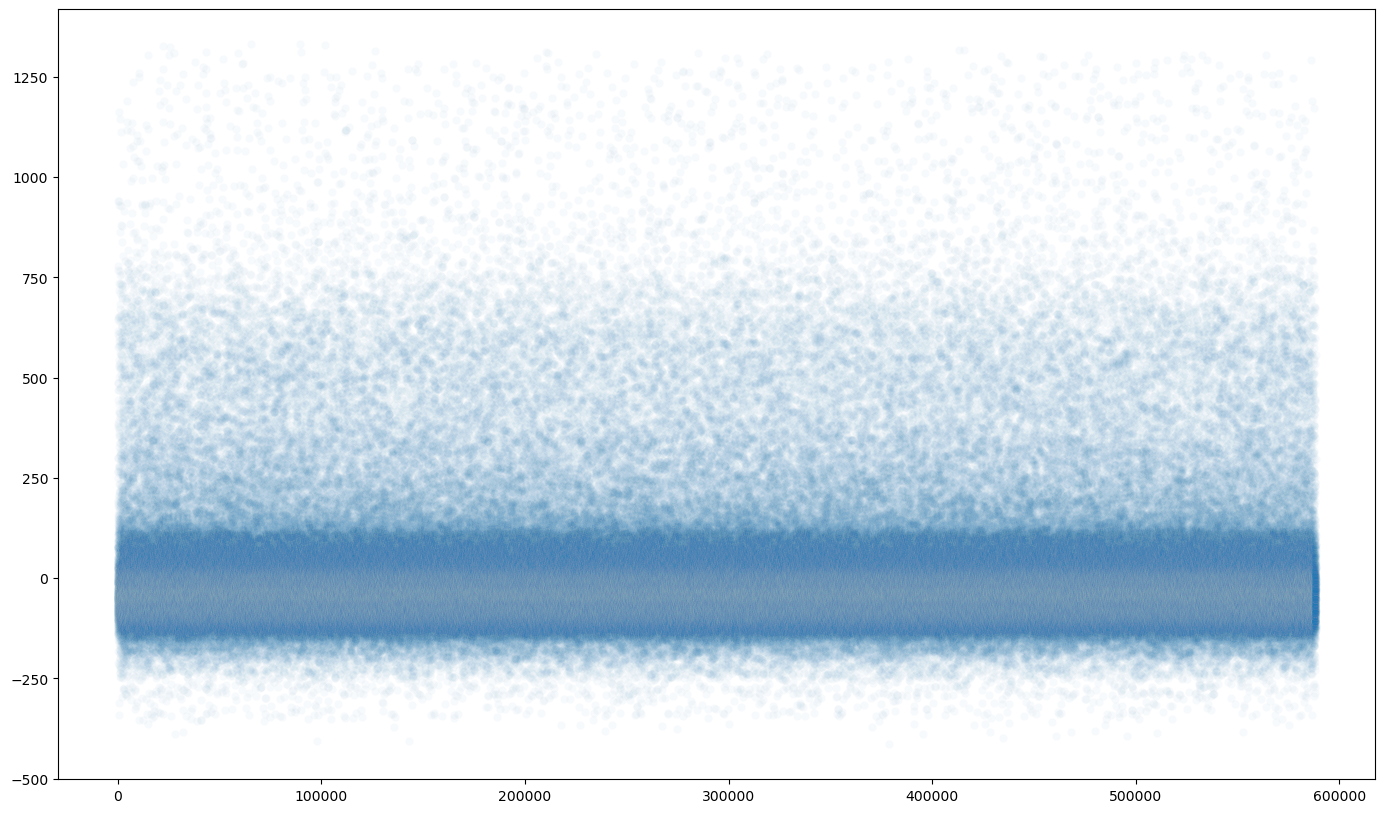

In [75]:
sns.scatterplot((y_te - y_pr), alpha = 0.03)

In [76]:
#now, with our additional features, lets try cutting our dataset down to eliminate any samples over 360mins

In [78]:
def prep_data(df):
    x = df[expanded_feats]
    y = df[val_to_predict]
    cat = ["weather", "Junction", "Stop", "Traffic_Signal", "Sunrise_Sunset", "Day", "Hour", "State_County", "Station", "Roundabout", "Give_Way", "Crossing", "Amenity", "Bump", "No_Exit", "Railway"]
    x = x.join(pd.get_dummies(df[cat]),lsuffix="ohe_")
    x = x.drop(labels=cat, axis=1)
    y = np.array(y).ravel()
    x_tr, x_te, y_tr, y_te = train_test_split(x, y)
    
    return x_tr, x_te, y_tr, y_te

In [79]:
df2 = df[df["duration(min)"] < 360.0]

In [80]:
x_tr, x_te, y_tr, y_te = prep_data(df2)

In [81]:
greg2 = GradientBoostingRegressor(random_state=42)
greg2.fit(x_tr, y_tr)
y_pr = greg2.predict(x_te)

In [82]:
greg2.score(x_tr, y_tr)

0.11371550704903399

In [83]:
greg2.score(x_te, y_te)

0.11417275475402178

<AxesSubplot: >

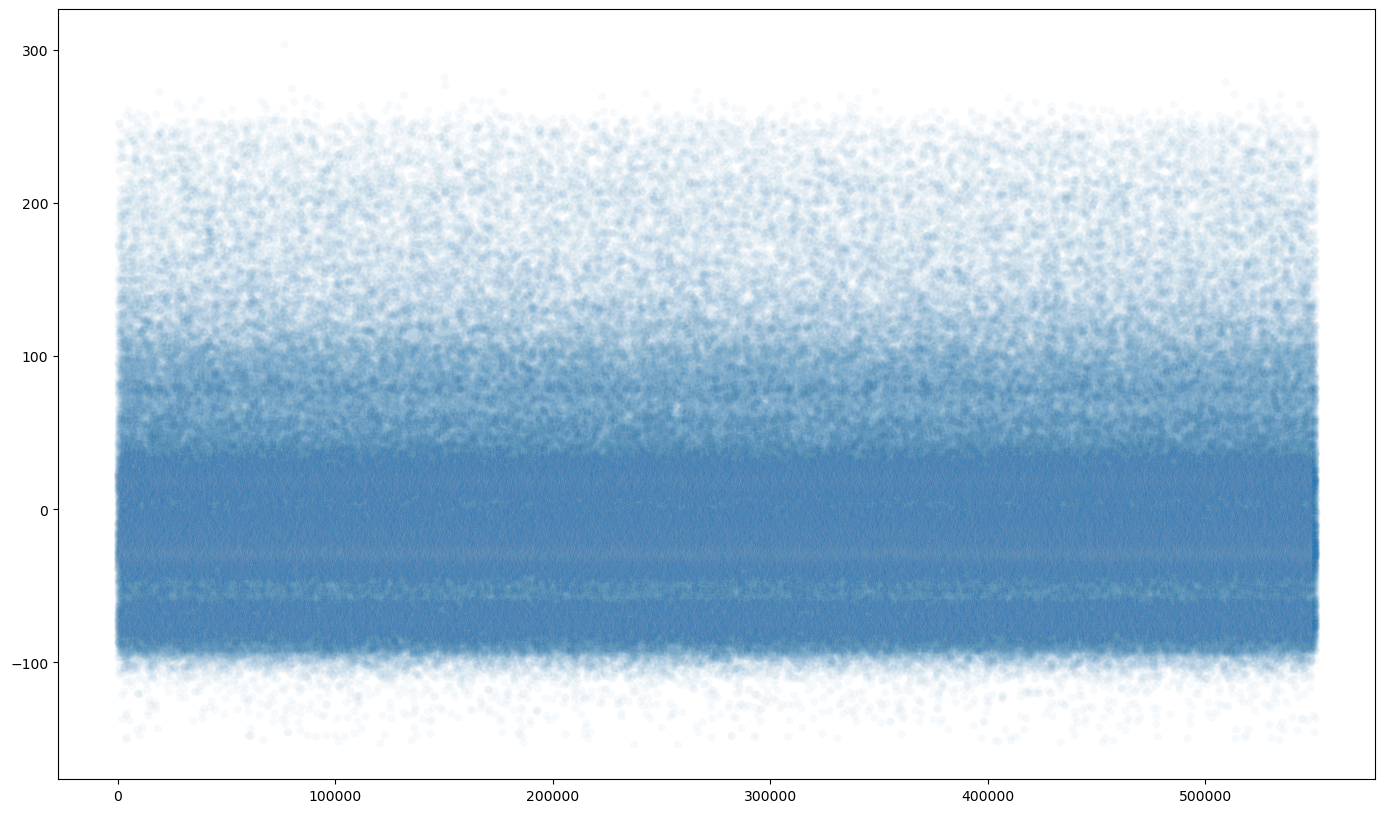

In [84]:
sns.scatterplot((y_te - y_pr), alpha = 0.03)

In [86]:
greg2.feature_importances_.shape

(2596,)

In [88]:
x_tr.shape

(1651901, 2596)

In [93]:
importances = pd.Series(index=x_tr.columns.tolist(),data=greg2.feature_importances_)

In [95]:
importances.sort_values(ascending=False).head(20)

Severity                      0.470772
Hourohe_                      0.070711
State_County_OR,Multnomah     0.061741
Traffic_Signalohe_            0.031528
State_County_OR,Lane          0.027538
State_County_OR,Marion        0.025154
Sunrise_Sunset_Day            0.023934
Junctionohe_                  0.021711
Temperature(F)                0.021030
Sunrise_Sunset_Night          0.019889
State_County_OR,Douglas       0.018317
State_County_OR,Clackamas     0.018305
State_County_OR,Jackson       0.015706
State_County_OR,Linn          0.014819
State_County_OR,Klamath       0.012689
State_County_OR,Deschutes     0.011020
State_County_FL,Miami-Dade    0.010840
State_County_OR,Umatilla      0.010724
State_County_OR,Washington    0.009525
State_County_UT,Salt Lake     0.008353
dtype: float64

In [97]:
df["duration(min)"].value_counts().head(25)

240.000000    48815
15.000000     35955
30.000000     33479
60.000000     27456
75.000000     25185
105.000000    23939
45.000000     18048
120.000000    15896
20.000000     12593
34.966667     11003
75.016667     10570
59.000000      7139
49.966667      5952
20.500000      5619
165.000000     5443
78.016667      4968
21.000000      4669
64.966667      4160
96.000000      4111
29.500000      3858
14.000000      3771
78.000000      3687
13.000000      3634
480.000000     3545
75.033333      3296
Name: duration(min), dtype: int64

In [107]:
y_pr[4]

106.15896384220478

In [108]:
y_te[4]

255.03333333333333

In [109]:
x_sub = df[["Severity", "Hour", "Traffic_Signal", "Junction", "Sunrise_Sunset"]]
y = df["duration(min)"]

In [112]:
cat = ["Severity", "Hour", "Traffic_Signal", "Junction", "Sunrise_Sunset"]
x_sub = x_sub.join(pd.get_dummies(x_sub[cat]),lsuffix="_ohe")
x_sub = x_sub.drop(labels=cat, axis=1)
y = np.array(y).ravel()
x_tr, x_te, y_tr, y_te = train_test_split(x, y)

C:\Users\brendo\AppData\Local\Temp\ipykernel_20472\982888356.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Hour_ohe', 'Junction_ohe', 'Traffic_Signal_ohe', 'Severity_ohe'} in the result is deprecated and will raise a MergeError in a future version.
  x_sub = x_sub.join(pd.get_dummies(x_sub[cat]),lsuffix="_ohe")


In [113]:
greg3 = GradientBoostingRegressor(random_state=42)
greg3.fit(x_tr, y_tr)
y_pr = greg3.predict(x_te)

In [114]:
greg3.score(x_tr, y_tr)
greg3.score(x_te, y_te)

0.1250052274543222

In [117]:
y_pr[1] - y_te[1]

85.45515798964036

In [126]:
df["duration(min)"].head(25)

136     540.000000
165     398.066667
497     375.050000
512     491.800000
523     368.116667
528     360.633333
587     840.000000
1120    364.516667
1122    370.316667
1130    368.766667
1151    361.266667
1309    360.650000
1380    379.583333
2034    362.116667
2039    397.166667
2394    365.333333
2395    379.000000
3251    120.000000
3270     60.000000
3710    366.416667
4146    361.383333
4641    235.116667
4934    420.000000
4978    360.683333
5013    374.366667
Name: duration(min), dtype: float64

In [128]:
y[18]

60.0

In [129]:
#new set
df2 = df[df["duration(min)"] < 239.9]
X = df2[["Severity", "Hour", "Traffic_Signal", "Junction", "Sunrise_Sunset"]]
Y = df2["duration(min)"]
cat = ["Severity", "Hour", "Traffic_Signal", "Junction", "Sunrise_Sunset"]
X = X.join(pd.get_dummies(X[cat]),lsuffix="_ohe")
X = X.drop(labels=cat, axis=1)
Y = np.array(Y).ravel()
x_tr, x_te, y_tr, y_te = train_test_split(x, y)

In [130]:
greg4 = GradientBoostingRegressor(random_state=42)
greg4.fit(x_tr, y_tr)
Y_pr = greg4.predict(x_te)

In [131]:
greg4.score(x_tr, y_tr)

0.1249862792487002

In [132]:
greg4.score(x_te, y_te)

0.12590963127261023

In [31]:
import xgboost as xgb

In [34]:
def prep_data(df):
    cat_vals = ["Severity", "Hour", "Traffic_Signal", "Junction", "Sunrise_Sunset"]
    val_to_predict = ["ETA"]
    x = df[cat_vals]
    y = df[val_to_predict]
    x = x.join(pd.get_dummies(df[cat_vals]),lsuffix="_ohe")
    x = x.drop(labels=cat_vals, axis=1)
    y = np.array(y).ravel()
    x_tr, x_te, y_tr, y_te = train_test_split(x, y)
    
    return x_tr, x_te, y_tr, y_te

In [35]:
x_tr, x_te, y_tr, y_te = prep_data(df)

KeyError: "None of [Index(['ETA'], dtype='object')] are in the [columns]"

In [140]:
train = xgb.DMatrix(data=x_tr, label=y_tr)
test = xgb.DMatrix(data=x_te, label=y_te)

In [169]:
param = {
    'max_depth' : 20,
    'eta' : 0.2}
epochs = 250

In [170]:
model = xgb.train(param, train, epochs)

In [171]:
predictions = model.predict(test)

In [172]:
predictions.shape

(588373,)

In [47]:
from sklearn.metrics import accuracy_score

In [174]:
r2_score(y_te, predictions)

0.07713193091546533

In [175]:
#aight what if we make this a categorical problem
df["duration(min)"].describe()

count    2.353492e+06
mean     1.393025e+02
std      1.550864e+02
min      2.000000e+00
25%      6.000000e+01
50%      1.000000e+02
75%      1.475000e+02
max      1.439983e+03
Name: duration(min), dtype: float64

<AxesSubplot: xlabel='duration(min)', ylabel='Count'>

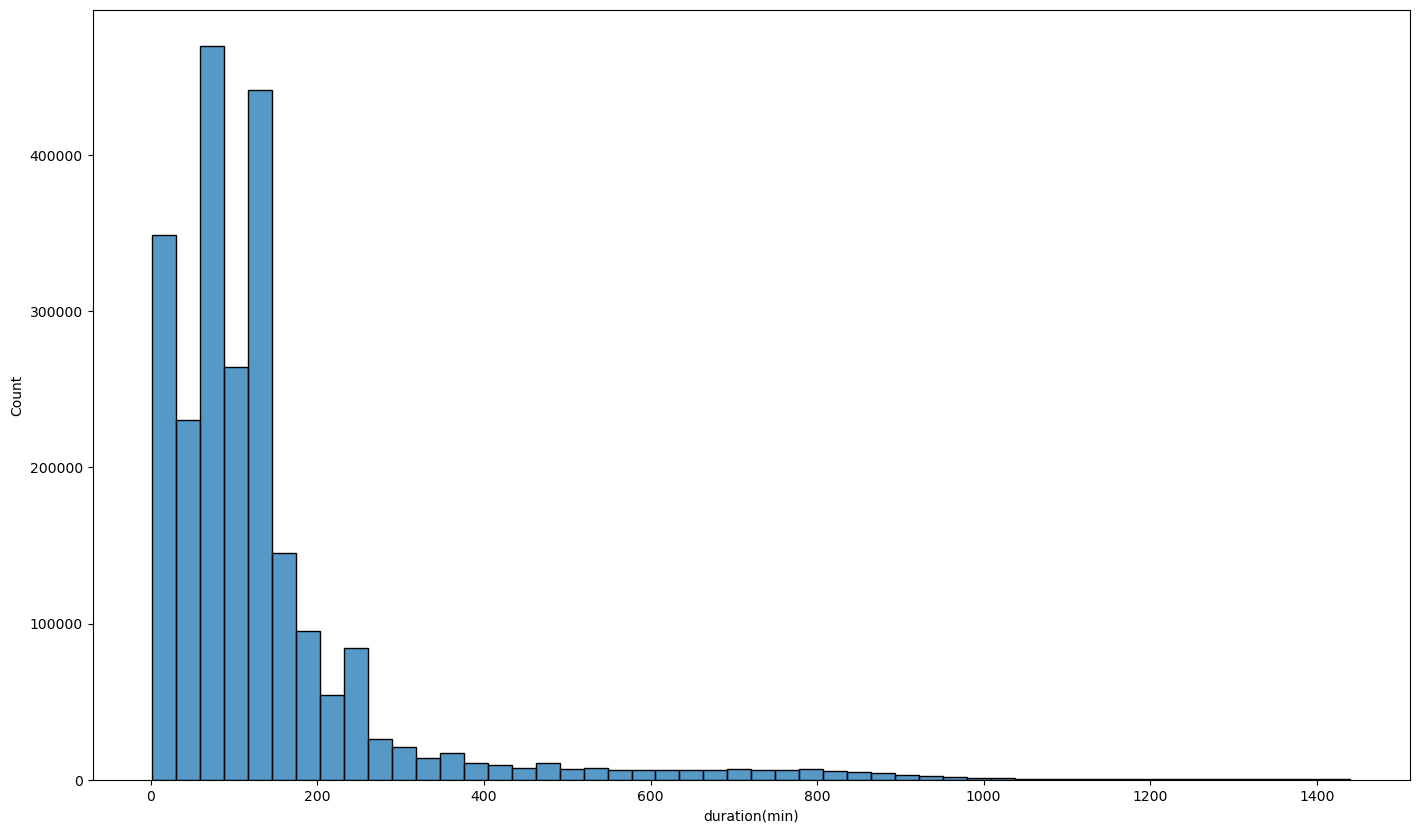

In [177]:
sns.histplot(df["duration(min)"],bins=50)

In [36]:
#15mins or less = 0
#15-30mins = 1
#30mins-1hr = 2
#1-3hr = 3
#3hr-6hr = 4
#rest of day = 5
df['ETA'] = 0
df.loc[df['duration(min)'] <= 15, 'ETA'] = 0 
df.loc[(df['duration(min)'] <= 30) & (df["duration(min)"] > 15), 'ETA'] = 1
df.loc[(df['duration(min)'] <= 60) & (df["duration(min)"] > 30), 'ETA'] = 2
df.loc[(df['duration(min)'] <= 180) & (df["duration(min)"] > 60), 'ETA'] = 3
df.loc[(df['duration(min)'] <= 360) & (df["duration(min)"] > 180), 'ETA'] = 4
df.loc[df['duration(min)'] > 360, 'ETA'] = 5

In [37]:
def prep_data(df):
    cat_vals = ["weather", "Junction", "Stop", "Traffic_Signal", "Sunrise_Sunset", "Day", "Hour", "State_County", "Station", "Roundabout", "Give_Way", "Crossing", "Amenity", "Bump", "No_Exit", "Railway"]
    x = df[cat_vals]
    y = df['ETA']
    x = x.join(pd.get_dummies(df[cat_vals]),lsuffix="_ohe")
    x = x.drop(labels=cat_vals, axis=1)
    y = np.array(y).ravel()
    x_tr, x_te, y_tr, y_te = train_test_split(x, y)
    
    return x_tr, x_te, y_tr, y_te

In [41]:
x_train, x_test, y_train, y_test = prep_data(df)

In [42]:
Train = xgb.DMatrix(data=x_train, label=y_train)
Test = xgb.DMatrix(data=x_test, label=y_test)

In [43]:
params = {
    "eta" : 0.2,
    "objective" : "multi:softmax",
    "num_class" : 6
    }
epochs = 25

In [44]:
Model = xgb.train(params, Train, epochs)

In [45]:
Predictions = Model.predict(Test)

In [48]:
accuracy_score(y_test, Predictions)

0.5707994758427052

In [49]:
x_train.shape

(1765119, 2613)

In [51]:
type(Model.get_score())

dict

In [52]:
feature_weights = pd.Series(Model.get_score())

In [55]:
feature_weights.sort_values(ascending=False).head(20)

Hour_ohe                      2461.0
Day_Sunday                     365.0
Traffic_Signal_ohe             338.0
Junction_ohe                   327.0
Day_Saturday                   292.0
Sunrise_Sunset_Day             264.0
weather_cloudy                 255.0
weather_fair                   255.0
Crossing_ohe                   255.0
weather_rain                   197.0
Day_Monday                     189.0
Day_Thursday                   181.0
Day_Tuesday                    178.0
Day_Wednesday                  178.0
Day_Friday                     178.0
Station_ohe                    145.0
weather_snow                   130.0
State_County_FL,Miami-Dade     103.0
Stop_ohe                        91.0
weather_windy                   81.0
dtype: float64

In [56]:
x_train.head(5)

Junction_ohe  Stop_ohe  Traffic_Signal_ohe  Hour_ohe  Station_ohe  \
1907098         False     False                True         3        False   
1825847         False     False                True         2        False   
516197          False     False               False        10        False   
1564768         False     False               False        14        False   
385493          False     False               False        21        False   

         Roundabout_ohe  Give_Way_ohe  Crossing_ohe  Amenity_ohe  Bump_ohe  \
1907098           False         False          True        False     False   
1825847           False         False         False        False     False   
516197            False         False         False        False     False   
1564768           False         False         False        False     False   
385493            False         False         False        False     False   

         ...  State_County_WY,Lincoln  State_County_WY,Natrona  \
1907098  ...                        0                        0   
1825847  ...                        0                        0   
516197   ...                        0                        0   
1564768  ...                        0                        0   
385493   ...                        0                        0   

         State_County_WY,Niobrara  State_County_WY,Park  \
1907098                         0                     0   
1825847                         0                     0   
516197                          0                     0   
1564768                         0                     0   
385493                          0                     0   

         State_County_WY,Platte  State_County_WY,Sheridan  \
1907098                       0                         0   
1825847                       0                         0   
516197                        0                         0   
1564768                       0                         0   
385493                        0                         0   

         State_County_WY,Sublette  State_County_WY,Sweetwater  \
1907098                         0                           0   
1825847                         0                           0   
516197                          0                           0   
1564768                         0                           0   
385493                          0                           0   

         State_County_WY,Teton  State_County_WY,Uinta  
1907098                      0                      0  
1825847                      0                      0  
516197                       0                      0  
1564768                      0                      0  
385493                       0                      0  

[5 rows x 2613 columns]

In [93]:
#looks like the hour is encoded as an ordinal...is this what we wanted?
#potentially adverse affects?
def prep_data(df):
    cat_vals = ["Severity", "weather", "Junction", "Stop", "Traffic_Signal", "Sunrise_Sunset", "Day", "Hour", "Station", "Roundabout", "Give_Way", "Crossing", "Amenity", "Bump", "No_Exit", "Railway"]
    x = df[cat_vals]
    y = df['ETA']
    x = x.join(pd.get_dummies(df[cat_vals]),lsuffix="_ohe")
    x = x.drop(labels=cat_vals, axis=1)
    y = np.array(y).ravel()
    x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size=0.8)
    
    return x_tr, x_te, y_tr, y_te

In [94]:
xtrain, xtest, ytrain, ytest = prep_data(df)

In [95]:
train = xgb.DMatrix(data=xtrain, label=ytrain)
test = xgb.DMatrix(data=xtest, label=ytest)

In [97]:
params = {
    "eta" : 0.2,
    "objective" : "multi:softprob",
    "num_class" : 6
    }
epochs = 50

In [98]:
model = xgb.train(params, train, epochs)

In [152]:
ypred = model.predict(test)

In [100]:
pd.Series(model.get_fscore()).sort_values(ascending=False)

Hour_ohe              4870.0
Severity_ohe          1477.0
Traffic_Signal_ohe     914.0
Junction_ohe           766.0
Day_Saturday           742.0
Day_Sunday             735.0
Crossing_ohe           724.0
Sunrise_Sunset_Day     711.0
Station_ohe            473.0
weather_rain           461.0
weather_fair           451.0
Day_Friday             384.0
weather_snow           382.0
Day_Monday             352.0
Day_Tuesday            348.0
weather_cloudy         335.0
Day_Thursday           330.0
Railway_ohe            297.0
Stop_ohe               274.0
Day_Wednesday          272.0
Amenity_ohe            265.0
weather_fog            203.0
weather_storm          190.0
weather_windy          172.0
Give_Way_ohe           127.0
weather_smoke           88.0
No_Exit_ohe             54.0
Bump_ohe                45.0
Roundabout_ohe          15.0
weather_dust            13.0
weather_hail            12.0
dtype: float64

In [83]:
ypred[3]

3.0

In [84]:
ytest[3]

3

In [104]:
ypred[1]

array([0.01452787, 0.04698686, 0.08968169, 0.6602873 , 0.15350933,
       0.03500693], dtype=float32)

In [105]:
ypred[0].argmax()

3

In [123]:
ypreds_alone = np.argmax(ypred,axis=1)

In [124]:
ytest.shape

(470699,)

In [125]:
accuracy_score(ytest, ypreds_alone)

0.5923998138938047

In [122]:
ypreds_alone

(470699,)

In [126]:
ypreds_alone[0:20]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3],
      dtype=int64)

In [127]:
ytest[0:20]

array([3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3],
      dtype=int64)

In [130]:
ypred[0].sum()

0.99999994

In [131]:
xtrain.shape

(1882793, 32)

In [142]:
model.predict(xgb.DMatrix(data=np.zeros((32,1)),label=ytrain))

XGBoostError: [03:15:36] C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/data/data.cc:455: Check failed: this->labels.Size() % this->num_row_ == 0 (9 vs. 0) : Incorrect size for labels.

In [151]:
model.predict(xgb.DMatrix(data=np.zeros((32,1))))

ValueError: training data did not have the following fields: Severity_ohe, Junction_ohe, Stop_ohe, Traffic_Signal_ohe, Hour_ohe, Station_ohe, Roundabout_ohe, Give_Way_ohe, Crossing_ohe, Amenity_ohe, Bump_ohe, No_Exit_ohe, Railway_ohe, weather_cloudy, weather_dust, weather_fair, weather_fog, weather_hail, weather_rain, weather_smoke, weather_snow, weather_storm, weather_windy, Sunrise_Sunset_Day, Sunrise_Sunset_Night, Day_Friday, Day_Monday, Day_Saturday, Day_Sunday, Day_Thursday, Day_Tuesday, Day_Wednesday

In [147]:
xtrain.columns

Index(['Severity_ohe', 'Junction_ohe', 'Stop_ohe', 'Traffic_Signal_ohe',
       'Hour_ohe', 'Station_ohe', 'Roundabout_ohe', 'Give_Way_ohe',
       'Crossing_ohe', 'Amenity_ohe', 'Bump_ohe', 'No_Exit_ohe', 'Railway_ohe',
       'weather_cloudy', 'weather_dust', 'weather_fair', 'weather_fog',
       'weather_hail', 'weather_rain', 'weather_smoke', 'weather_snow',
       'weather_storm', 'weather_windy', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [153]:
xtrain

Severity_ohe  Junction_ohe  Stop_ohe  Traffic_Signal_ohe  Hour_ohe  \
806769              2         False     False               False        21   
976679              2         False     False               False        13   
762643              2         False     False               False        13   
2142006             3         False     False               False         9   
1368688             2         False     False               False        11   
...               ...           ...       ...                 ...       ...   
2061767             2         False     False               False        23   
1031529             2         False     False               False        16   
2607160             2         False     False               False        14   
1752261             2         False     False               False        12   
794571              2          True     False               False         2   

         Station_ohe  Roundabout_ohe  Give_Way_ohe  Crossing_ohe  Amenity_ohe  \
806769         False           False         False         False        False   
976679         False           False         False         False        False   
762643         False           False         False         False        False   
2142006        False           False         False         False        False   
1368688        False           False         False         False        False   
...              ...             ...           ...           ...          ...   
2061767        False           False         False         False        False   
1031529        False           False         False         False        False   
2607160        False           False         False         False        False   
1752261        False           False         False         False        False   
794571         False           False         False         False        False   

         ...  weather_windy  Sunrise_Sunset_Day  Sunrise_Sunset_Night  \
806769   ...              0                   0                     1   
976679   ...              0                   1                     0   
762643   ...              0                   1                     0   
2142006  ...              0                   1                     0   
1368688  ...              0                   1                     0   
...      ...            ...                 ...                   ...   
2061767  ...              0                   0                     1   
1031529  ...              0                   1                     0   
2607160  ...              0                   1                     0   
1752261  ...              0                   1                     0   
794571   ...              0                   0                     1   

         Day_Friday  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
806769            1           0             0           0             0   
976679            0           0             0           0             1   
762643            0           0             0           0             0   
2142006           0           0             0           0             0   
1368688           0           0             1           0             0   
...             ...         ...           ...         ...           ...   
2061767           0           0             0           0             1   
1031529           1           0             0           0             0   
2607160           0           1             0           0             0   
1752261           0           0             1           0             0   
794571            1           0             0           0             0   

         Day_Tuesday  Day_Wednesday  
806769             0              0  
976679             0              0  
762643             1              0  
2142006            0              1  
1368688            0              0  
...              ...            ...  
2061767            0              0  
10315

In [154]:
ex = xtrain.columns

In [159]:
ex = pd.DataFrame(data=np.zeros((1,32)),columns=xtrain.columns)

In [162]:
ey = np.zeros((1,32))

In [166]:
model.predict(xgb.DMatrix(ex))

array([[0.14757195, 0.47877088, 0.1939727 , 0.16803548, 0.00862412,
        0.00302487]], dtype=float32)

In [168]:
df_copy = df

In [172]:
#15mins or less = 0
#15-30mins = 1
#30mins-1hr = 2
#1-3hr = 3
#3hr-6hr = 4
#rest of day = 5
df['subtime'] = ""
df.loc[df['Hour'] <= 5, 'subtime'] = "Late Night"
df.loc[(df['Hour'] <= 7) & (df["Hour"] > 5), 'subtime'] = "Early Morning"
df.loc[(df['Hour'] <= 11) & (df["Hour"] > 7), 'subtime'] = "Morning"
df.loc[(df['Hour'] <= 15) & (df["Hour"] > 11), 'subtime'] = "Midday"
df.loc[(df['Hour'] <= 18) & (df["Hour"] > 15), 'subtime'] = "Afternoon"
df.loc[(df['Hour'] <= 21) & (df["Hour"] > 18), 'subtime'] = "Evening"
df.loc[df["Hour"] > 21, 'subtime'] = "Night"

In [175]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'duration(min)', 'Time_of_Incident', 'Day',
       'Hour', 'weather', 'ETA', 'State_County', 'subtime'],
      dtype='object')

In [192]:
def prep_data(df):
    cat_vals = ["Severity", "weather", "Junction", "Stop", "Traffic_Signal", "Sunrise_Sunset", "Day", "Hour", "Station", "Roundabout", "Give_Way", "Crossing", "Bump", "No_Exit", "Railway"]
    con_vals = ["Visibility(mi)", "Precipitation(in)"]
    x = df[cat_vals+con_vals]
    y = df['ETA']
    x = x.join(pd.get_dummies(df[cat_vals]),lsuffix="_ohe")
    x = x.drop(labels=cat_vals, axis=1)
    y = np.array(y).ravel()
    x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size=0.8)
    
    return x_tr, x_te, y_tr, y_te

In [193]:
xtr, xte, ytr, yte = prep_data(df)

In [194]:
train = xgb.DMatrix(data=xtr, label=ytr)
test = xgb.DMatrix(data=xte, label=yte)

In [195]:
params = {
    "eta" : 0.2,
    "objective" : "multi:softprob",
    "num_class" : 6
    }
epochs = 50

In [196]:
zemodel = xgb.train(params, train, epochs)

In [197]:
ypr = zemodel.predict(test)

In [198]:
ypr_alone = np.argmax(ypr,axis=1)

In [199]:
#subtime_acc = accuracy_score(yte, ypr_alone)
hour_acc = accuracy_score(yte, ypr_alone)

In [200]:
#with_subtime = pd.Series(zemodel.get_fscore()).sort_values(ascending=False)
with_hour = pd.Series(zemodel.get_fscore()).sort_values(ascending=False)

In [201]:
subtime_acc - hour_acc

-0.0009496514757838526

In [202]:
with_subtime

Visibility(mi)           2245.0
Severity_ohe             1521.0
Precipitation(in)        1367.0
Traffic_Signal_ohe        825.0
Sunrise_Sunset_Day        711.0
Day_Saturday              667.0
Day_Sunday                657.0
Junction_ohe              648.0
Crossing_ohe              570.0
subtime_Afternoon         570.0
Station_ohe               419.0
weather_fair              374.0
subtime_Early Morning     355.0
weather_rain              339.0
subtime_Evening           339.0
Day_Friday                338.0
weather_cloudy            336.0
subtime_Morning           334.0
Day_Monday                333.0
weather_snow              332.0
subtime_Late Night        306.0
subtime_Midday            296.0
subtime_Night             293.0
Day_Thursday              292.0
Day_Tuesday               288.0
Day_Wednesday             283.0
Stop_ohe                  226.0
Railway_ohe               224.0
weather_windy             184.0
weather_storm             148.0
weather_fog               112.0
weather_

In [203]:
with_hour

Hour_ohe              3947.0
Visibility(mi)        1792.0
Severity_ohe          1377.0
Precipitation(in)     1315.0
Traffic_Signal_ohe     806.0
Day_Sunday             696.0
Day_Saturday           648.0
Junction_ohe           611.0
Sunrise_Sunset_Day     588.0
Crossing_ohe           537.0
Station_ohe            348.0
Day_Friday             326.0
weather_fair           310.0
weather_cloudy         303.0
Day_Thursday           299.0
weather_rain           279.0
Day_Tuesday            271.0
weather_snow           262.0
Day_Monday             254.0
Day_Wednesday          252.0
Stop_ohe               225.0
weather_windy          201.0
Railway_ohe            197.0
weather_storm          126.0
weather_fog            110.0
weather_smoke           87.0
Give_Way_ohe            74.0
No_Exit_ohe             50.0
Bump_ohe                22.0
weather_dust            14.0
weather_hail            10.0
Roundabout_ohe           9.0
dtype: float64

In [204]:
#lets export our dataframe and start in a clean notebook

In [205]:
df.to_csv('cleaned_data.csv')